# Download Apple Watch data

This template provides example code for accessing and saving Apple Watch data. This includes accelerometry, rotation, and probability scores for tremor and dyskinesia.

In [1]:
import io
import os
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from runeq import Config, stream

## Functions for pulling watch data (acceleration, rotation, heart rate, tremor, dyskinesia)

In [2]:
def make_full_df(accessor):
    """Loop through pages of API calls and append to a single dataframe"""

    df = pd.DataFrame()
    for page in accessor.iter_csv_text():
        page_df = pd.read_csv(io.StringIO(page))
        df = df.append(page_df, ignore_index=True)

    return df

def get_watch_data(client, params, field, save_filepath=None):
    """Makes API calls for watch data, saves to CSV and outputs dataframe"""
    fields = {
        'accel': client.Accel(**params),
        'rotation': client.Rotation(**params),
        'heart rate': client.HeartRate(**params),
        'tremor': client.ProbabilitySymptom(
            symptom='tremor',
            **params),
        'tremor severity': client.ProbabilitySymptom(
            symptom='tremor',
            severity='*',
            **params),
        'dyskinesia': client.ProbabilitySymptom(
            symptom='dyskinesia',
            **params)
    }
    
    if field not in fields:
        raise ValueError('Please choose an existing field')  
    
    accessor = fields[field]
    df = make_full_df(accessor)

    if save_filepath:
        df.to_csv(save_filepath, index=False)

    return df

## 1. Initialize API credentials

First initialize your API credentials. These credentials are analogous to having a username/password for accessing patient data. You can set up an access token for read access to all patients within your organization. See our [API doc](https://docs.runelabs.io/stream/#section/Overview/Authentication) for instructions on how to set this up.

Next, set up a .yaml file with your token ID and secret. This is text file that will store your credentials. See our [`runeq` quickstart](https://runeq.readthedocs.io/en/latest/pages/quickstart.html#configuration) for how to set this up.

In [3]:
# set up client

cfg = Config()
client = stream.V1Client(cfg)

## 2. Specify endpoint parameters

Each endpoint requires certain parameters, while others are optional. The endpoints that handle Apple Watch data, like most others, require `patient_id`, `device_id`, `start_time`, and `end_time`. These parameters can be gathered from the desired patient's record in the [Rune research portal](https://app.runelabs.io/). The patient ID is at the top left corner of the screen when viewing patient data, and a "copy device ID" button is under each data stream. Both are also available in the patient settings menu (click the "gear" icon).

In addition, the `ProbabilitySymptom` endpoint requires the `symptom` parameter, which is typically `tremor` or `dyskinesia`.

Optional parameters are specified in the associated [API docs](https://docs.runelabs.io/), and provide a variety of additional functionality.

In [4]:
params = {
    'patient_id': 'e55be14b26594294a398f9ae48967539',
    'device_id': 'ys82RFZd',  # an Apple Watch
    # Use datetime to get timestamps from human-readable dates/times
    'start_time': dt.datetime(2021, 5, 16, hour=15, minute=30).timestamp(),
    'end_time': dt.datetime(2021, 5, 16, hour=17, minute=0).timestamp()
}

We will pass the client, our parameters, the desired data stream(s), and a file path for saving our data into the function defined above to obtain the CSV data. Be sure to change the file directories below to match your own file structure.

In [5]:
# specify base path for saving data

BASE_PATH = '~/Documents/api_data/'

If saving the dataframe as a csv file is unnecessary, the optional `save_filepath` parameter can be left unspecified. For example,
```
accel = get_watch_data(
    client,
    params,
    'accel'
)
```

## 3. Retrieve accelerometry, rotation, heart rate, tremor, and dyskinesia data

We will pass the client, our parameters, and a file path for saving our data into the `get_watch_data` function above to obtain the following dataframes and CSV data. If saving the dataframe to a CSV file, be sure to change the file directories below. The `get_watch_data` function accepts the following values for the `field` parameter: `'accel'`, `'rotation'`, `'heart rate'`, `'tremor'`, `'tremor severity'`, `'dyskinesia'`.

In [6]:
accel = get_watch_data(
    client,
    params,
    'accel',
    os.path.join(BASE_PATH, 'nb02_ex01_accel.csv')
)
rotation = get_watch_data(
    client,
    params,
    'rotation',
    os.path.join(BASE_PATH, 'nb02_ex01_rotation.csv')
)
heartrate = get_watch_data(
    client,
    params,
    'heart rate',
    os.path.join(BASE_PATH, 'nb02_ex01_heartrate.csv')
)
tremor_prob = get_watch_data(
    client,
    params,
    'tremor',
    os.path.join(BASE_PATH, 'nb02_ex01_tremor.csv')
)
tremor_severity = get_watch_data(
    client,
    params,
    'tremor severity',
    os.path.join(BASE_PATH, 'nb02_ex01_tremor_severity.csv')
)
dyskinesia = get_watch_data(
    client,
    params,
    'dyskinesia',
    os.path.join(BASE_PATH, 'nb02_ex01_dyskinesia.csv')
)

If loading previously downloaded data from CSV files:
```
accel = pd.read_csv(os.path.join(BASE_PATH, 'nb02_ex01_accel.csv'))
rotation = pd.read_csv(os.path.join(BASE_PATH, 'nb02_ex01_rotation.csv'))
heartrate = pd.read_csv(os.path.join(BASE_PATH, 'nb02_ex01_heartrate.csv'))
tremor = pd.read_csv(os.path.join(BASE_PATH, 'nb02_ex01_tremor.csv'))
tremor_severity = pd.read_csv(os.path.join(BASE_PATH, 'nb02_ex01_tremor_severity.csv'))
dyskinesia = pd.read_csv(os.path.join(BASE_PATH, 'nb02_ex01_dyskinesia.csv'))
```

## 4. Plot watch data

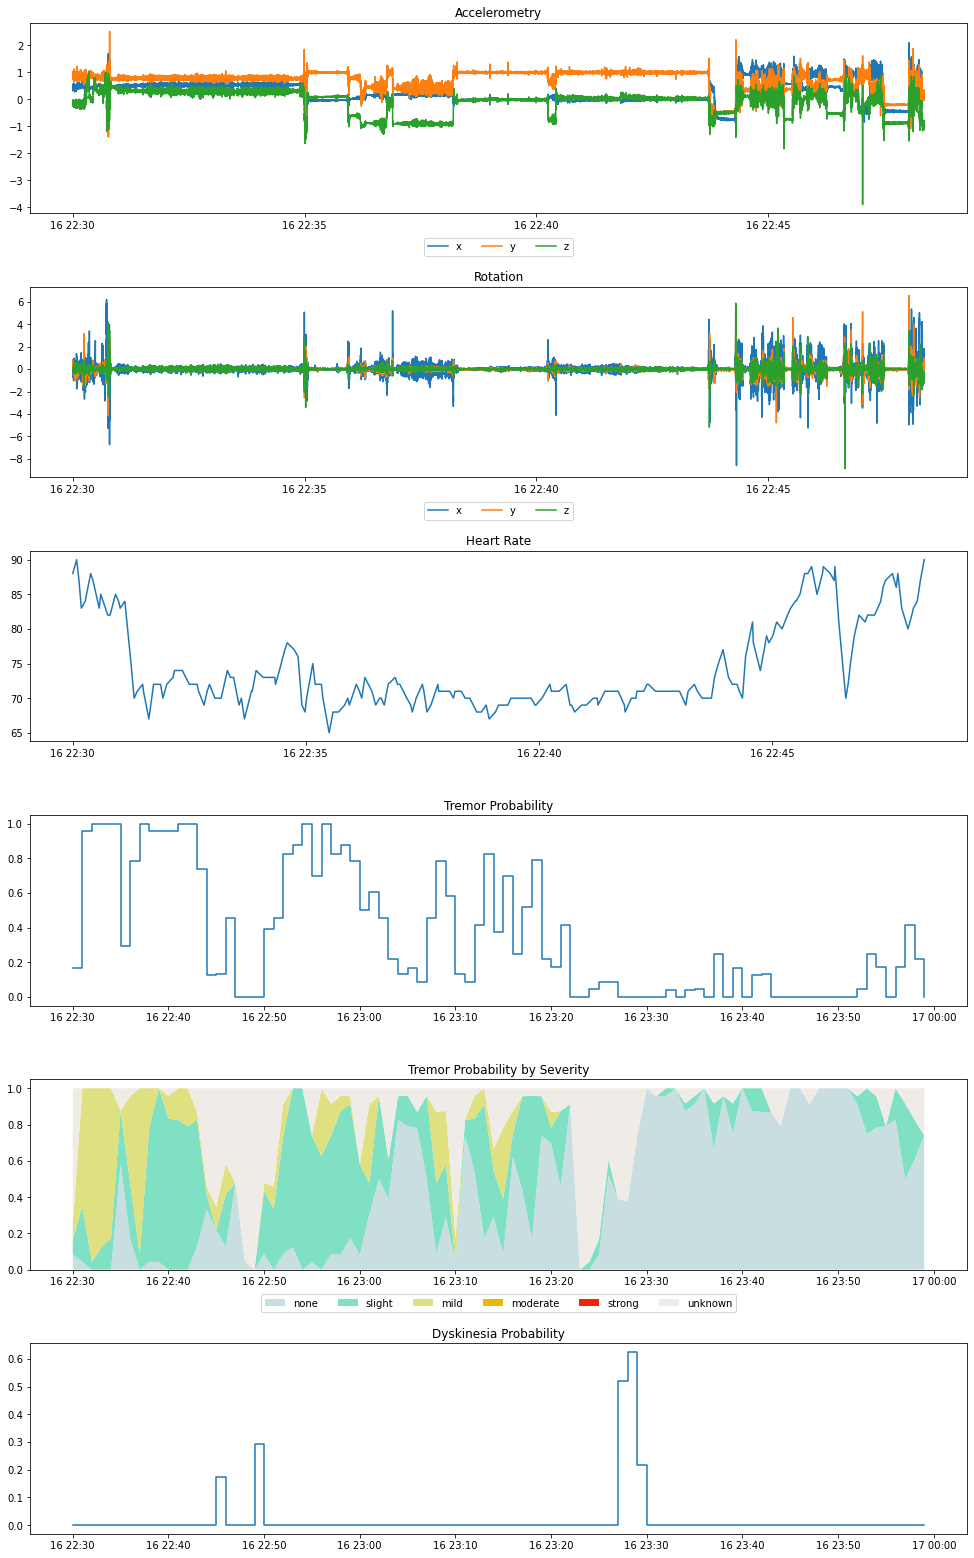

In [7]:
fig, ax = plt.subplots(6, figsize=(14, 22))

ax[0].plot(pd.to_datetime(accel.time, unit='s'), accel.x, label='x')
ax[0].plot(pd.to_datetime(accel.time, unit='s'), accel.y, label='y')
ax[0].plot(pd.to_datetime(accel.time, unit='s'), accel.z, label='z')
ax[0].legend(bbox_to_anchor=(0.5, -.25), loc='lower center', ncol=3)
ax[0].set_title('Accelerometry')

ax[1].plot(pd.to_datetime(rotation.time, unit='s'), rotation.x, label='x')
ax[1].plot(pd.to_datetime(rotation.time, unit='s'), rotation.y, label='y')
ax[1].plot(pd.to_datetime(rotation.time, unit='s'), rotation.z, label='z')
ax[1].legend(bbox_to_anchor=(0.5, -.25), loc='lower center', ncol=3)
ax[1].set_title('Rotation')

ax[2].plot(pd.to_datetime(heartrate.time, unit='s'), heartrate.bpm)
ax[2].set_title('Heart Rate');

ax[3].plot(pd.to_datetime(tremor_prob.time, unit='s'), tremor_prob.probability, drawstyle='steps-post')
ax[3].set_title('Tremor Probability')

ax[4].stackplot(pd.to_datetime(tremor_severity.time, unit='s'), 
                tremor_severity.none, 
                tremor_severity.slight, 
                tremor_severity.mild, 
                tremor_severity.moderate,
                tremor_severity.strong,
                tremor_severity.unknown,
                labels=['none', 'slight', 'mild', 'moderate', 'strong', 'unknown'],
                colors=['#C8DEE0','#7FE0C4', '#DFE07F', '#ECB607', '#F42207', '#EFEBE7']
               )
ax[4].legend(bbox_to_anchor=(0.5, -.25), loc='lower center', ncol=6)
ax[4].set_title('Tremor Probability by Severity')

ax[5].plot(pd.to_datetime(dyskinesia.time, unit='s'), dyskinesia.probability, drawstyle='steps-post')
ax[5].set_title('Dyskinesia Probability')

fig.tight_layout(pad=2)

The graphs shown above will display timestamps according to UTC time zone. To convert the time axis to your local time zone, you can offset the timestamps using the following code:

Text(0.5, 1.0, 'Dyskinesia Probability')

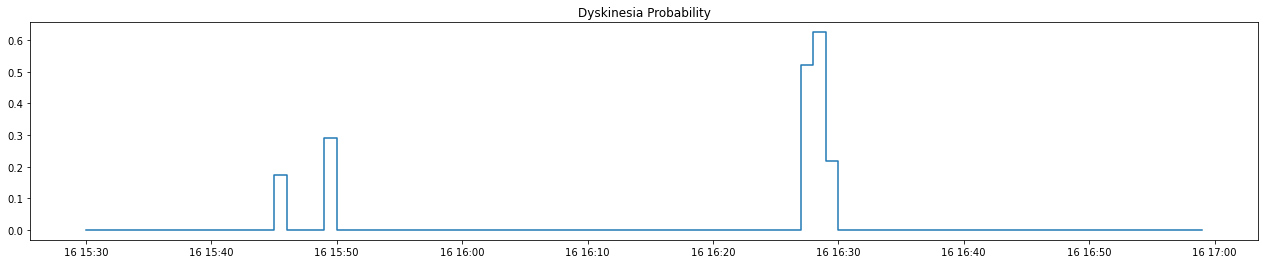

In [8]:
import time
# check if daylight savings applies to your timezone
is_dst = time.daylight and time.localtime().tm_isdst > 0

# find the offset from utc
utc_offset = - (time.altzone if is_dst else time.timezone)

# shift timestamps from UTC to local time
local_times = dyskinesia.time.copy()
local_times += utc_offset

fig, ax = plt.subplots(1, figsize=(22, 4))
ax.plot(pd.to_datetime(local_times, unit='s'), dyskinesia.probability, drawstyle='steps-post')
ax.set_title('Dyskinesia Probability')

## 5. Filter watch data

With these dataframes, we can easily obtain the timestamps in which certain symptoms were present/absent.

In [9]:
# filter by dyskinesia probability
# ex. probability > 0.1
dyskinesia[dyskinesia.probability > 0.1]

,time,probability
15,1.621205e+09,0.173913
19,1.621205e+09,0.291667
57,1.621208e+09,0.521739
58,1.621208e+09,0.625000
59,1.621208e+09,0.217391


In [10]:
# filter by tremor
# ex mild probability > 0.1 or slight probability > 0.1
tremor_severity[(tremor_severity.mild > 0.1) | (tremor_severity.slight > 0.1)]

,time,mild,moderate,none,slight,strong,unknown
1,1.621204e+09,0.652174,0,0.043478,0.304348,0,0.000000
2,1.621204e+09,0.956522,0,0.000000,0.043478,0,0.000000
3,1.621204e+09,0.875000,0,0.000000,0.125000,0,0.000000
4,1.621204e+09,0.826087,0,0.000000,0.173913,0,0.000000
5,1.621204e+09,0.000000,0,0.583333,0.291667,0,0.125000
6,1.621205e+09,0.478261,0,0.173913,0.304348,0,0.043478
7,1.621205e+09,0.916667,0,0.000000,0.083333,0,0.000000
8,1.621205e+09,0.217391,0,0.043478,0.739130,0,0.000000
9,1.621205e+09,0.000000,0,0.043478,0.956522,0,0.695652
10,1.621205e+09,0.125000,0,0.000000,0.833333,0,0.041667
